In [26]:
## Imports
import math
import numpy as np
import matplotlib.pyplot as plt

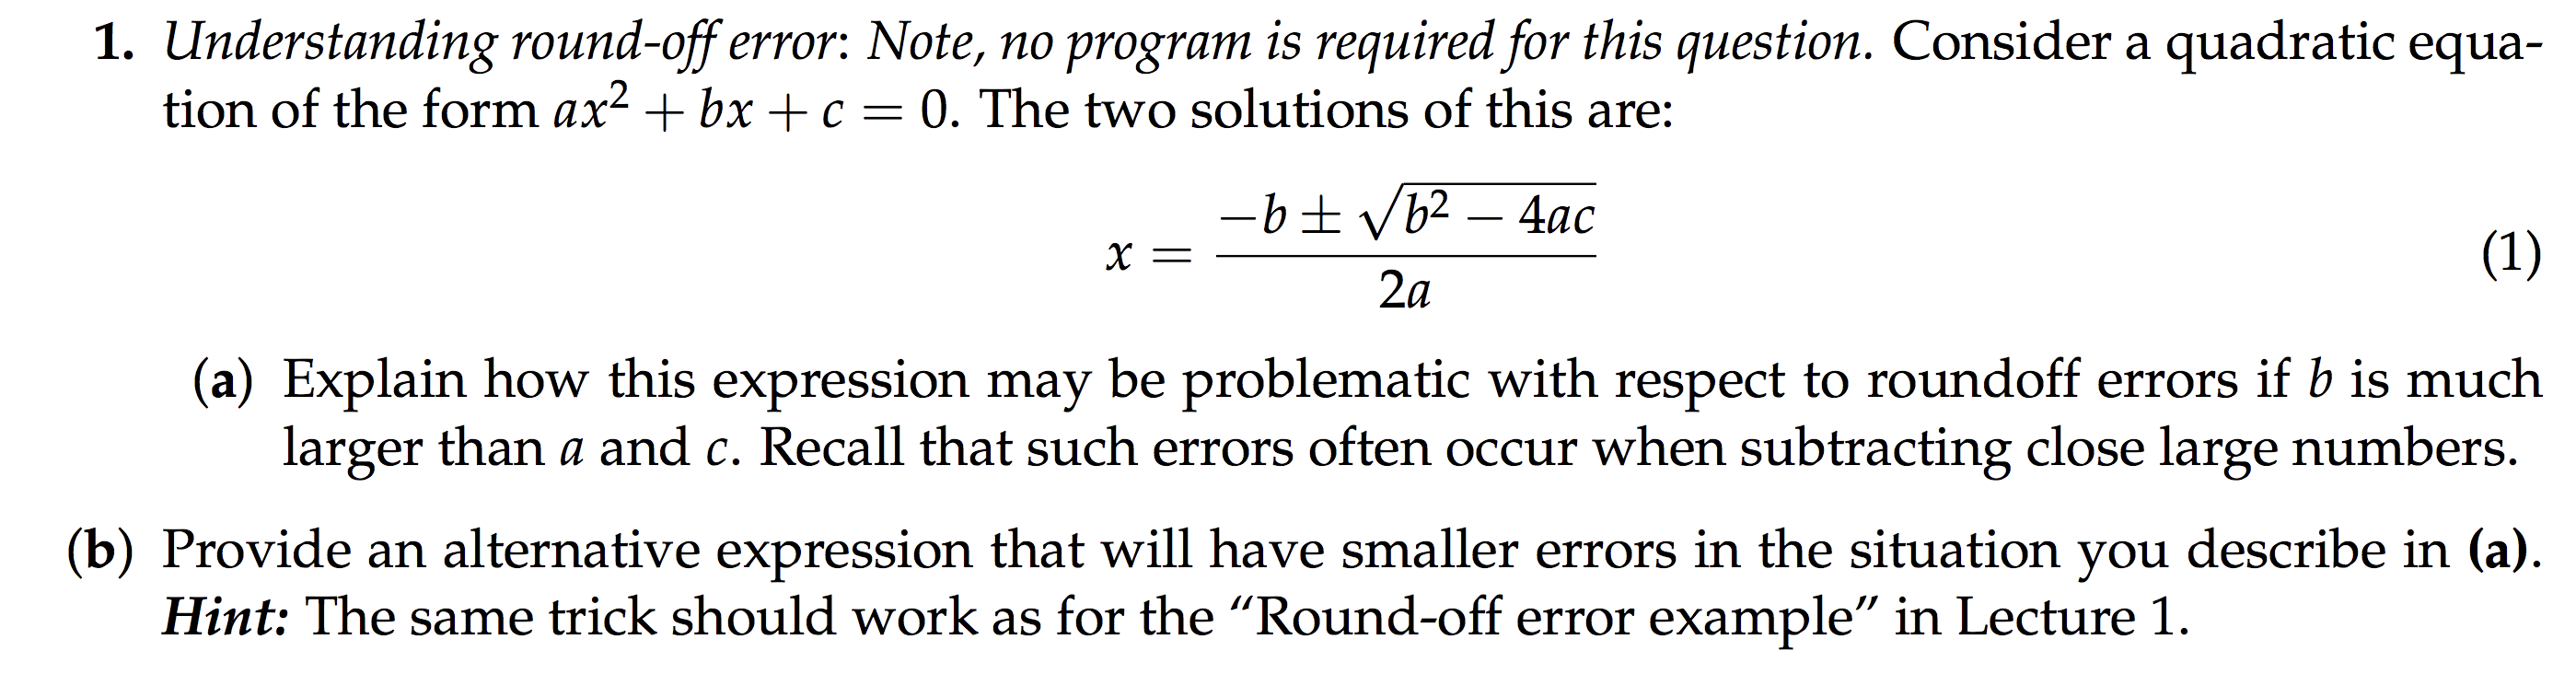

**(a)** When, $$b \gg a,c \implies b^{2} \gg 4ac,$$ the sqrt term can be approximated as, $$\sqrt{b^{2} - 4ac} \approx |b|,$$ However, in the numerator, we end up subtracting two very close large numbers, resulting in round-off errors.

**(b)** We have, $$x_{\pm} = \frac{-b \pm \sqrt{b^{2} - 4ac}}{2a}$$ A way to avoid this would be to multiply and divide $x_{\pm}$ by $$-b \mp \sqrt{b^{2} -4ac}$$ to get (t: transformed) $$x_{-}^{(t)} = \frac{2c}{-b + \sqrt{b^{2} - 4ac}}$$ and similiarly get, $$x_{+}^{(t)} = \frac{2c}{-b - \sqrt{b^{2} - 4ac}}$$ So, if $b \lt 0$, $x_{+}$ doesn't involve subtraction of two close large numbers and can be used as it is. However, $x_{-}$ does involve subtraction which will result in round-off errors, thus, we should use $x_{-}^{(t)}$ in this case to avoid round-off errors. $\\$

Similarly, in the case of $b \gt 0$, we should use $x_{+}^{(t)}$ and $x_{-}$ to avoid round-off errors.


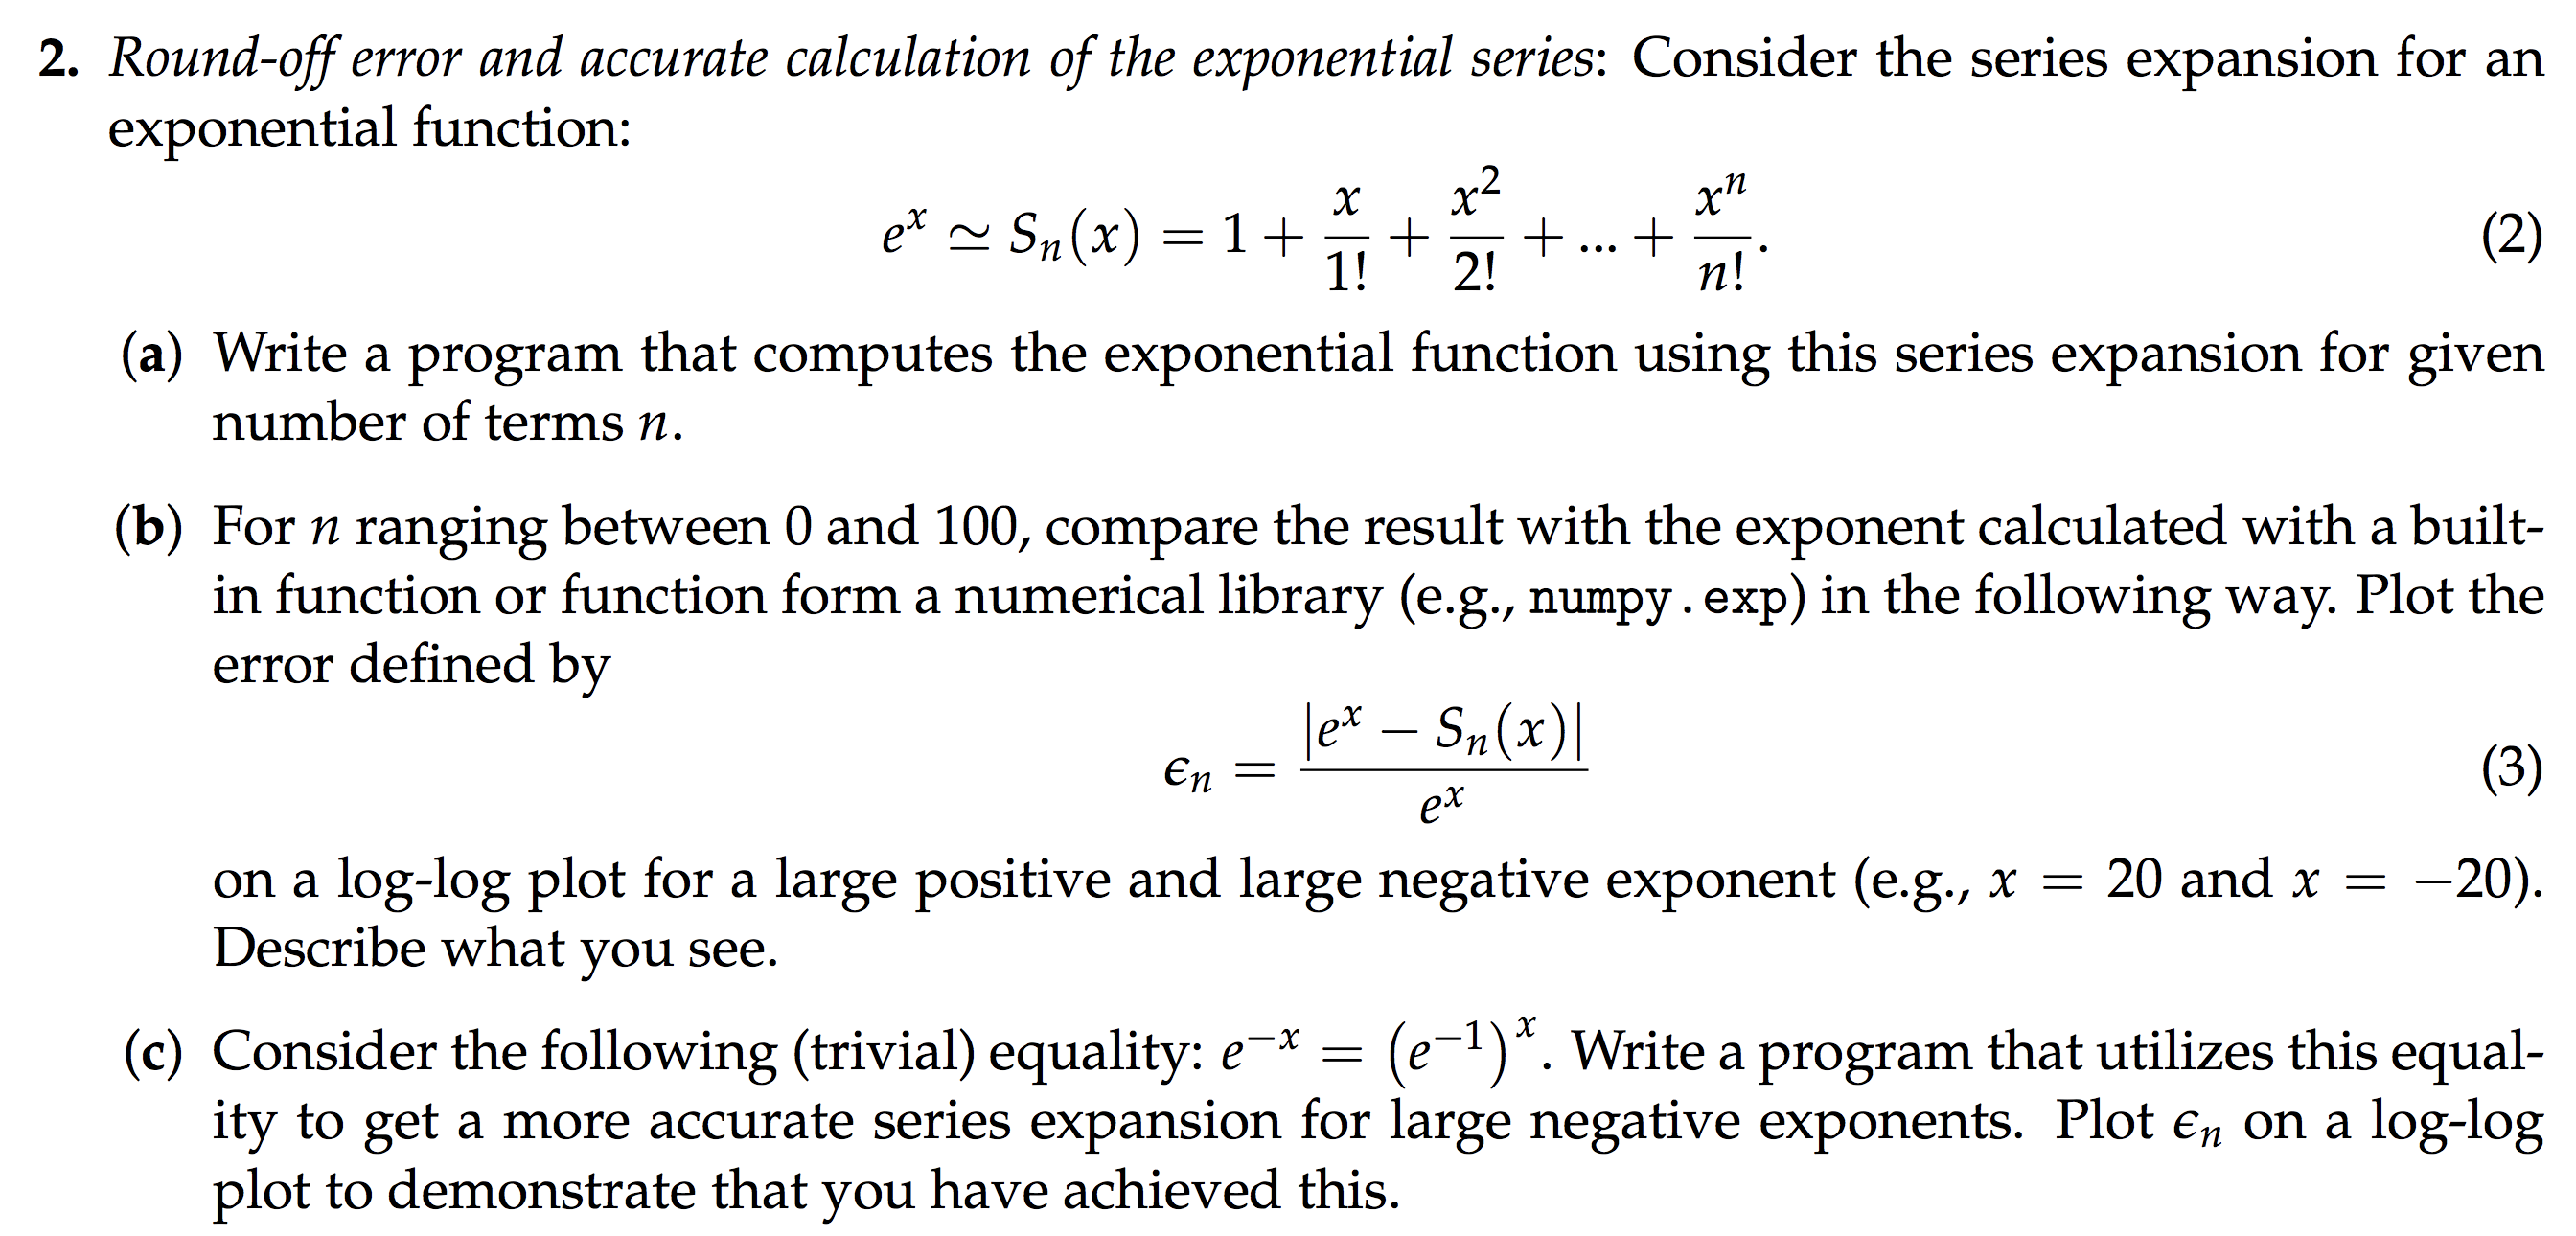

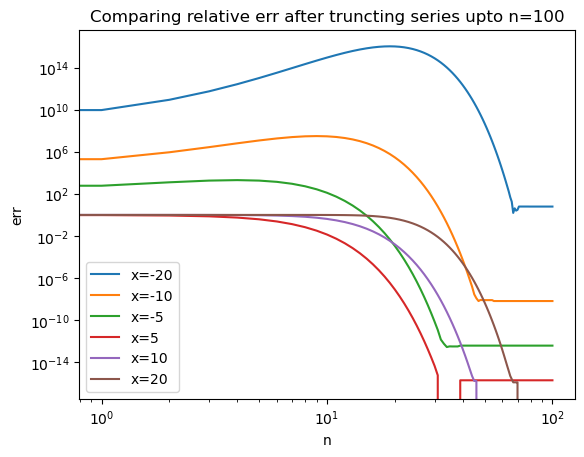

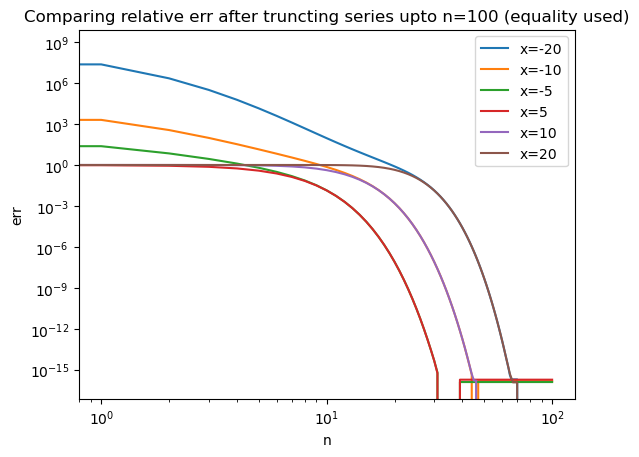

In [27]:
def compute_exp(x: float, n: int) -> float:
    """ Function to compute the exp of a given value using a series expansion for a given number of terms. 

        Args: x: value at which function is calculated (float)
              n: number of terms in the Series expansion (int)

        Returns: approximated value of the exponential using the series expansion (float)

    """
    
    series = np.empty(n+1) # (1D empty Numpy array) to store the running sum of the series 
    
    for i in range(n+1):
        series[i] = x**(i) / math.factorial(i)

    return series.sum()

def compare_exp(x: list[float], n: int, equality: bool):
    """ 
        Function to compare the exponent computed using the Maclaurin Series expansion with one computed from a built-in library funtion.

        Args: x: list of exponent values; list[float]
              n: number of terms in the series expansion; int
    """ 

    err = np.empty(n+1) # 1D empty numpy arr to store the err for every n
    x_vals = np.linspace(0,100, num=101)

    fig, ax = plt.subplots()

    for j in x:

        exp_lib = math.exp(j) # exp from python.math lib func

        if equality:
            if (j<0): # make the use of equality
                for i in range(n+1):
                    err[i] = abs(exp_lib - (1/compute_exp(abs(j),i))) / exp_lib
            else: 
                for i in range(n+1):
                    err[i] = abs(exp_lib - compute_exp(j,i)) / exp_lib
                
            ax.plot(x_vals, err, label=f"x={j}")
            ax.set_title("Comparing relative err after truncting series upto n=100 (equality used)", fontsize=12)

        else:
            for i in range(n+1):
                    err[i] = abs(exp_lib - compute_exp(j,i)) / exp_lib

            ax.plot(x_vals, err, label=f"x={j}")
            ax.set_title("Comparing relative err after truncting series upto n=100")

        ax.set_xlabel("n")
        ax.set_ylabel("err")
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.legend()

    return None

# exp_x = compute_exp(x=1,n=10)
compare_exp(x=[-20,-10,-5,5,10,20], n=100, equality=False)
compare_exp(x=[-20,-10,-5,5,10,20], n=100, equality=True)

**Q2(b) and (c)** From the above plot, we can see that for +ve exponents, the series expansion approximates the true value (based on some pre-defined threshold/tolerance (say, 1e-8)) with less number of terms in the series compared to the -ve exponents. $\\$ 

The truncation error for Taylor (Maclaurin, in this case) is given by, $$S_{N+1} = \frac{x^{(N+1)}}{(N+1)!}max(1,e^{x}), $$ thus, the relative error is, $$\epsilon_{N} = \frac{S_{N+1}}{e^{x}} = \frac{x^{(N+1)}}{(N+1)!} \hspace{5mm} (\text{for x>0}),$$ $\\$ For small +ve exponent x=5, the number of terms required (N) is smaller compared to large +ve exponent x=20. Both the exponential $x^{(N+1)}$ in the numerator and the factorial $(N+1)!$ in the denominator grow with N for fixed x, but, factorial term dominates the exponential for values of N > x. Thus, bringing down the error and requiring more terms. $\\$ For part (c), when the exponent is -ve, we have alternating +ve and -ve terms in the series expansion. For larger values of N, this results in subtraction of relatively close large values, resulting in round-off errors, thus, making the computation numerically unstable. After substituting, $$e^{-x} = (e^{-1})^{x} = \frac{1}{e^{x}}$$, we are essentially computing the +ve exponent(which doesn't involve subtraction of very large values) with series expansion and then inverting the result, avoiding round-off errors. We can see from the plot on the bottom that we are getting a better and faster convergence by using the equality.

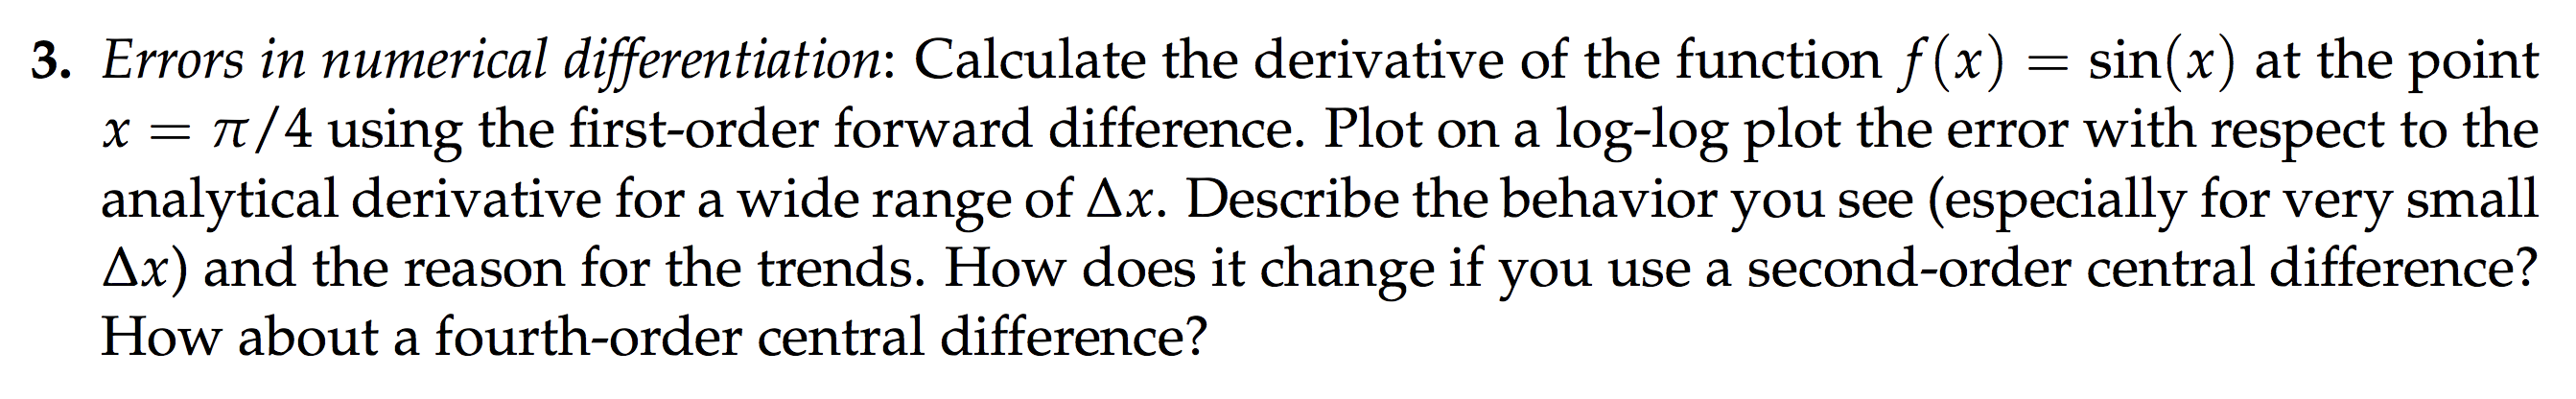

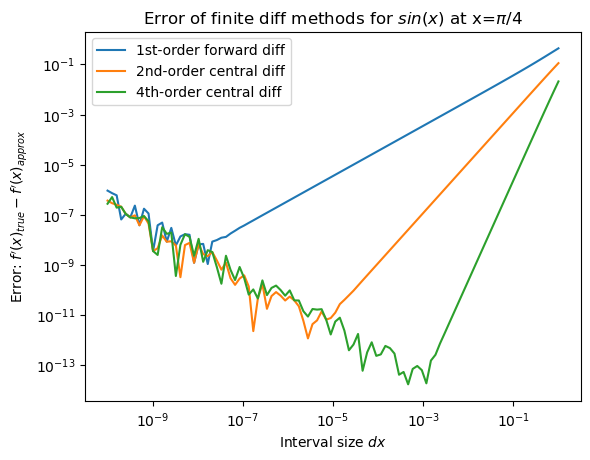

In [28]:
def forward_diff(val: float, dx: float):
    df = (math.sin(val + dx) - math.sin(val)) / dx
    return df

def second_central_diff(val: float, dx: float):
    df = (math.sin(val + dx) - math.sin(val - dx)) / (2*dx)
    return df

def fourth_central_diff(val: float, dx: float):
    df = ( math.sin(val - 2*dx) - 8*math.sin(val - dx) + 8*math.sin(val + dx) - math.sin(val + 2*dx) ) / (12*dx)
    return df

def df_dx(x: float, dx: list[float]):
    """
        Function to compute the derivative of a given function at a point x(float) using the finite difference method.

        Args: x: value at which derivative is to be evaluated
             dx: spacing of grid/interval size
    """

    # f = math.sin(x) # function of interest

    df = math.cos(x) # exact analytical value

    err_forward = np.empty(len(dx))
    err_2central = np.empty(len(dx))
    err_4central = np.empty(len(dx))

    fig, ax = plt.subplots()

    for i,j in enumerate(dx):
        err_forward[i] = abs(df - forward_diff(val=x, dx=j)) 
        err_2central[i] = abs(df - second_central_diff(val=x, dx=j)) 
        err_4central[i] = abs(df - fourth_central_diff(val=x, dx=j)) 
    
    ax.plot(dx, err_forward, label="1st-order forward diff")
    ax.plot(dx, err_2central, label="2nd-order central diff")
    ax.plot(dx, err_4central, label="4th-order central diff")
    ax.set_xlabel("Interval size $dx$")
    ax.set_xscale("log")
    ax.set_ylabel(r"Error: $f^{\prime}(x)_{true} - f^{\prime}(x)_{approx}$")
    ax.set_yscale("log")
    ax.set_title(r"Error of finite diff methods for $sin(x)$ at x=$\pi/4$")
    ax.legend()

    return None

df_dx(x=math.pi/4, dx=np.logspace(-10,0,num=100))

**Q3** For a very small $\Delta{x}$, we can see that the error is higher. This is because as we decrease the interval length or step size, we end up subtracting two very close numbers, resulting in round-off errors. We can also see from the above plot, that higher-order methods achieve the minimum error in larger step sizes, and the error minimum is lower (better accuracy).  

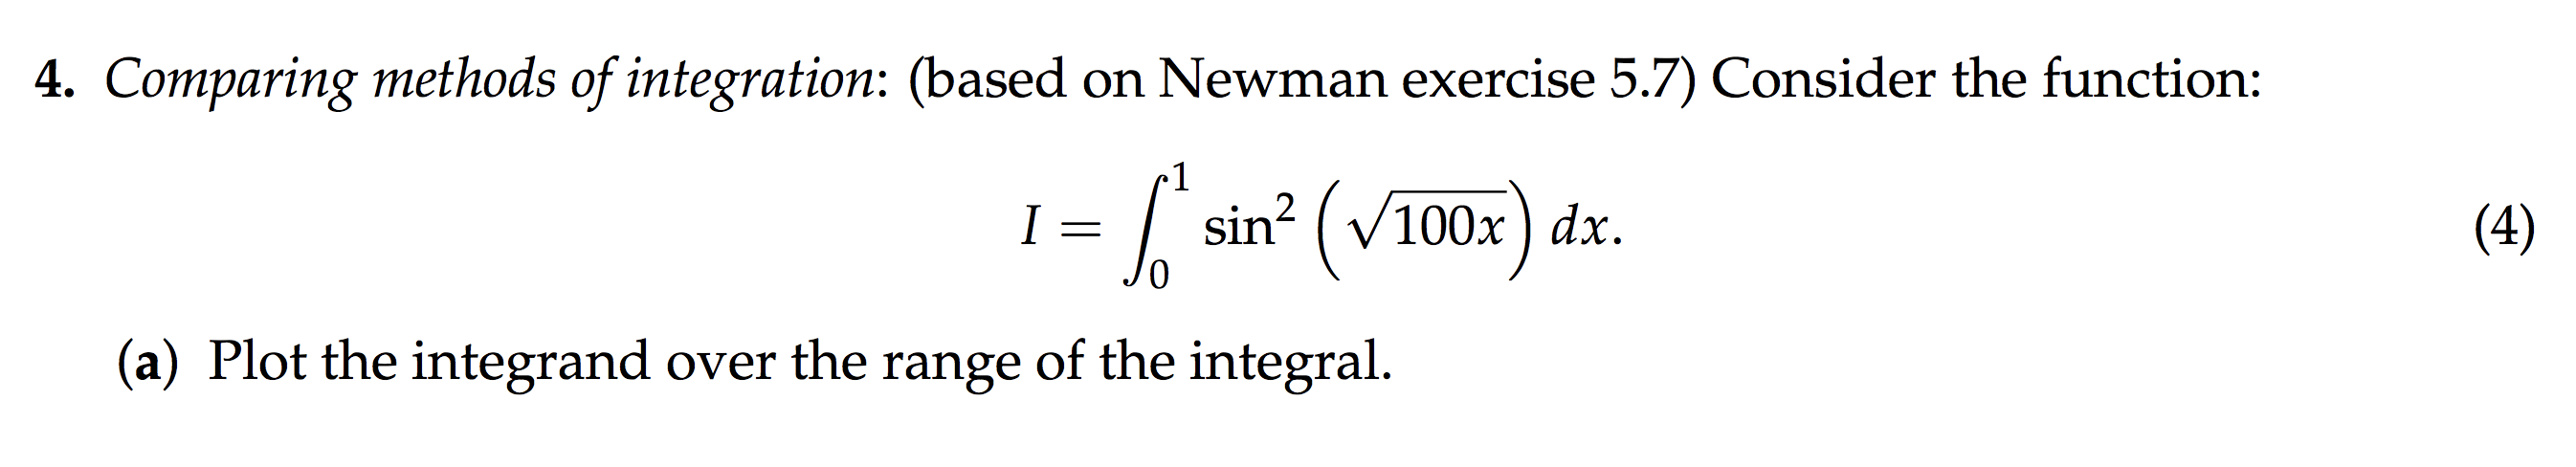

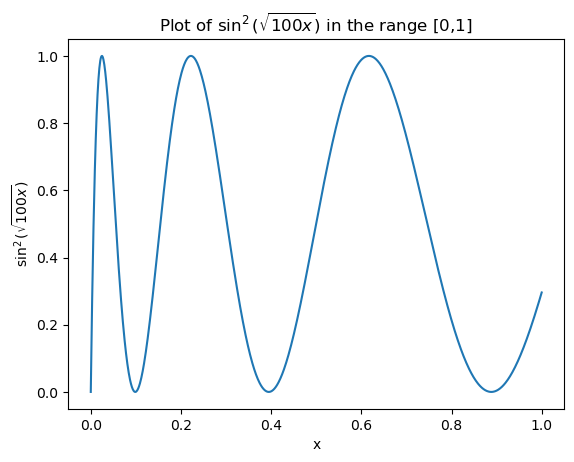

In [29]:
def plot_integrand():
    x = np.linspace(0,1,num=1000)
    integrand = (np.sin(np.sqrt(100*x)))**2
    plt.plot(x, integrand)
    plt.xlabel("x")
    plt.ylabel(r"$\sin^{2}(\sqrt{100x})$")
    plt.title("Plot of " + r"$\sin^{2}(\sqrt{100x})$" + " in the range [0,1]")
    return None

plot_integrand()

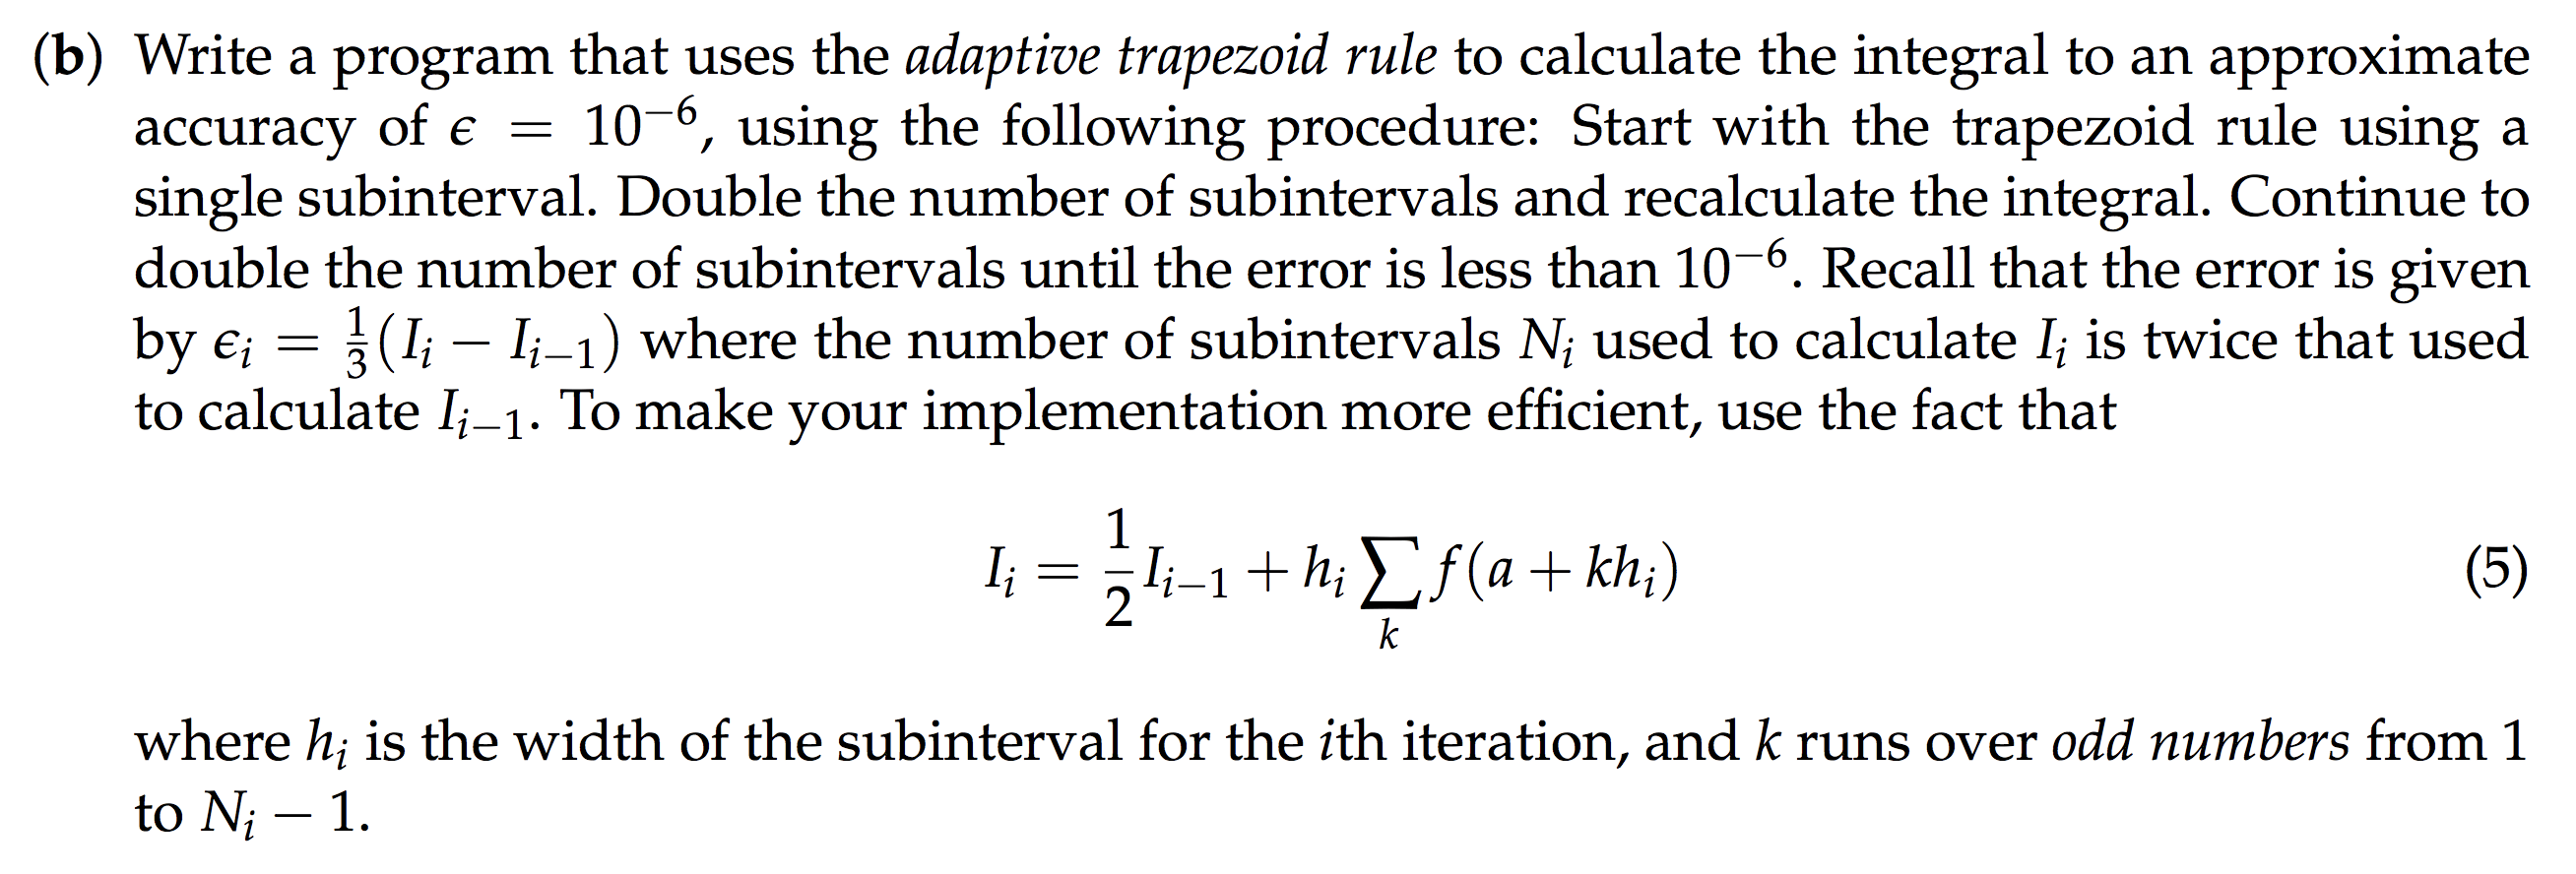

In [30]:
# Note: I have used ChatGPT for help in writing this code.

def trapezoid_int(x_low: float, x_high: float, tol: float):

    n = 1 # Number of subintervals starting from 1 and doubling every step till desired accuracy is achieved

    err_int = 0.0 # Error from successive computation of integrals

    integral = 0.0 # Value of integral at every iteration I_i

    for _ in range(100):

        if (n == 1):
            integral = 1/2 * (x_high - x_low) * ((np.sin(np.sqrt(100*x_high)))**2 + (np.sin(np.sqrt(100*x_low)))**2)

        else:
            # Since we are doubling the number of intervals, we need to add 2^(n-2) points to the grid at each step
            num_new_points = 2**(n-2)
            dx = (x_high - x_low) / num_new_points # Spacing b/w new points
            x_i = x_low + 1/2*dx # generate the points at which the sum of the iterative formula is evaluated starting from first new
                                 # point to be added 
            s = 0.0              # Variable for storing the sum

            for i in range(num_new_points):
                s += np.sin(np.sqrt(100*x_i))**2
                x_i += dx

            integral_prev = integral
            integral = 1/2*integral + 1/2*dx*s

            err_int = 1/3 * (integral - integral_prev)
            print(err_int, integral)

            if (abs(err_int) < tol): return print("Using Adaptive Trapezoid integration, No. of iterations needed before the error reaches below tolerance: ", n-1)

        n += 1

    return None

trapezoid_int(x_low=0.0, x_high=1.0, tol=1e-6)
# print(steps)

0.05908414108660753 0.3252319078064746
0.06235031430561895 0.5122828507233315
-0.03642846741502771 0.4029974484782483
0.009035306938832883 0.43010336929474696
0.0061037654975743165 0.4484146657874699
0.001832755142635293 0.4539129312153758
0.000478524385808754 0.45534850437280205
0.00012092069347964991 0.455711266453241
3.0311066141042176e-05 0.45580219965166413
7.582826918613635e-06 0.45582494813241997
1.8960230755242038e-06 0.45583063620164654
4.740255414859007e-07 0.455832058278271
Using Adaptive Trapezoid integration, No. of iterations needed before the error reaches below tolerance:  12


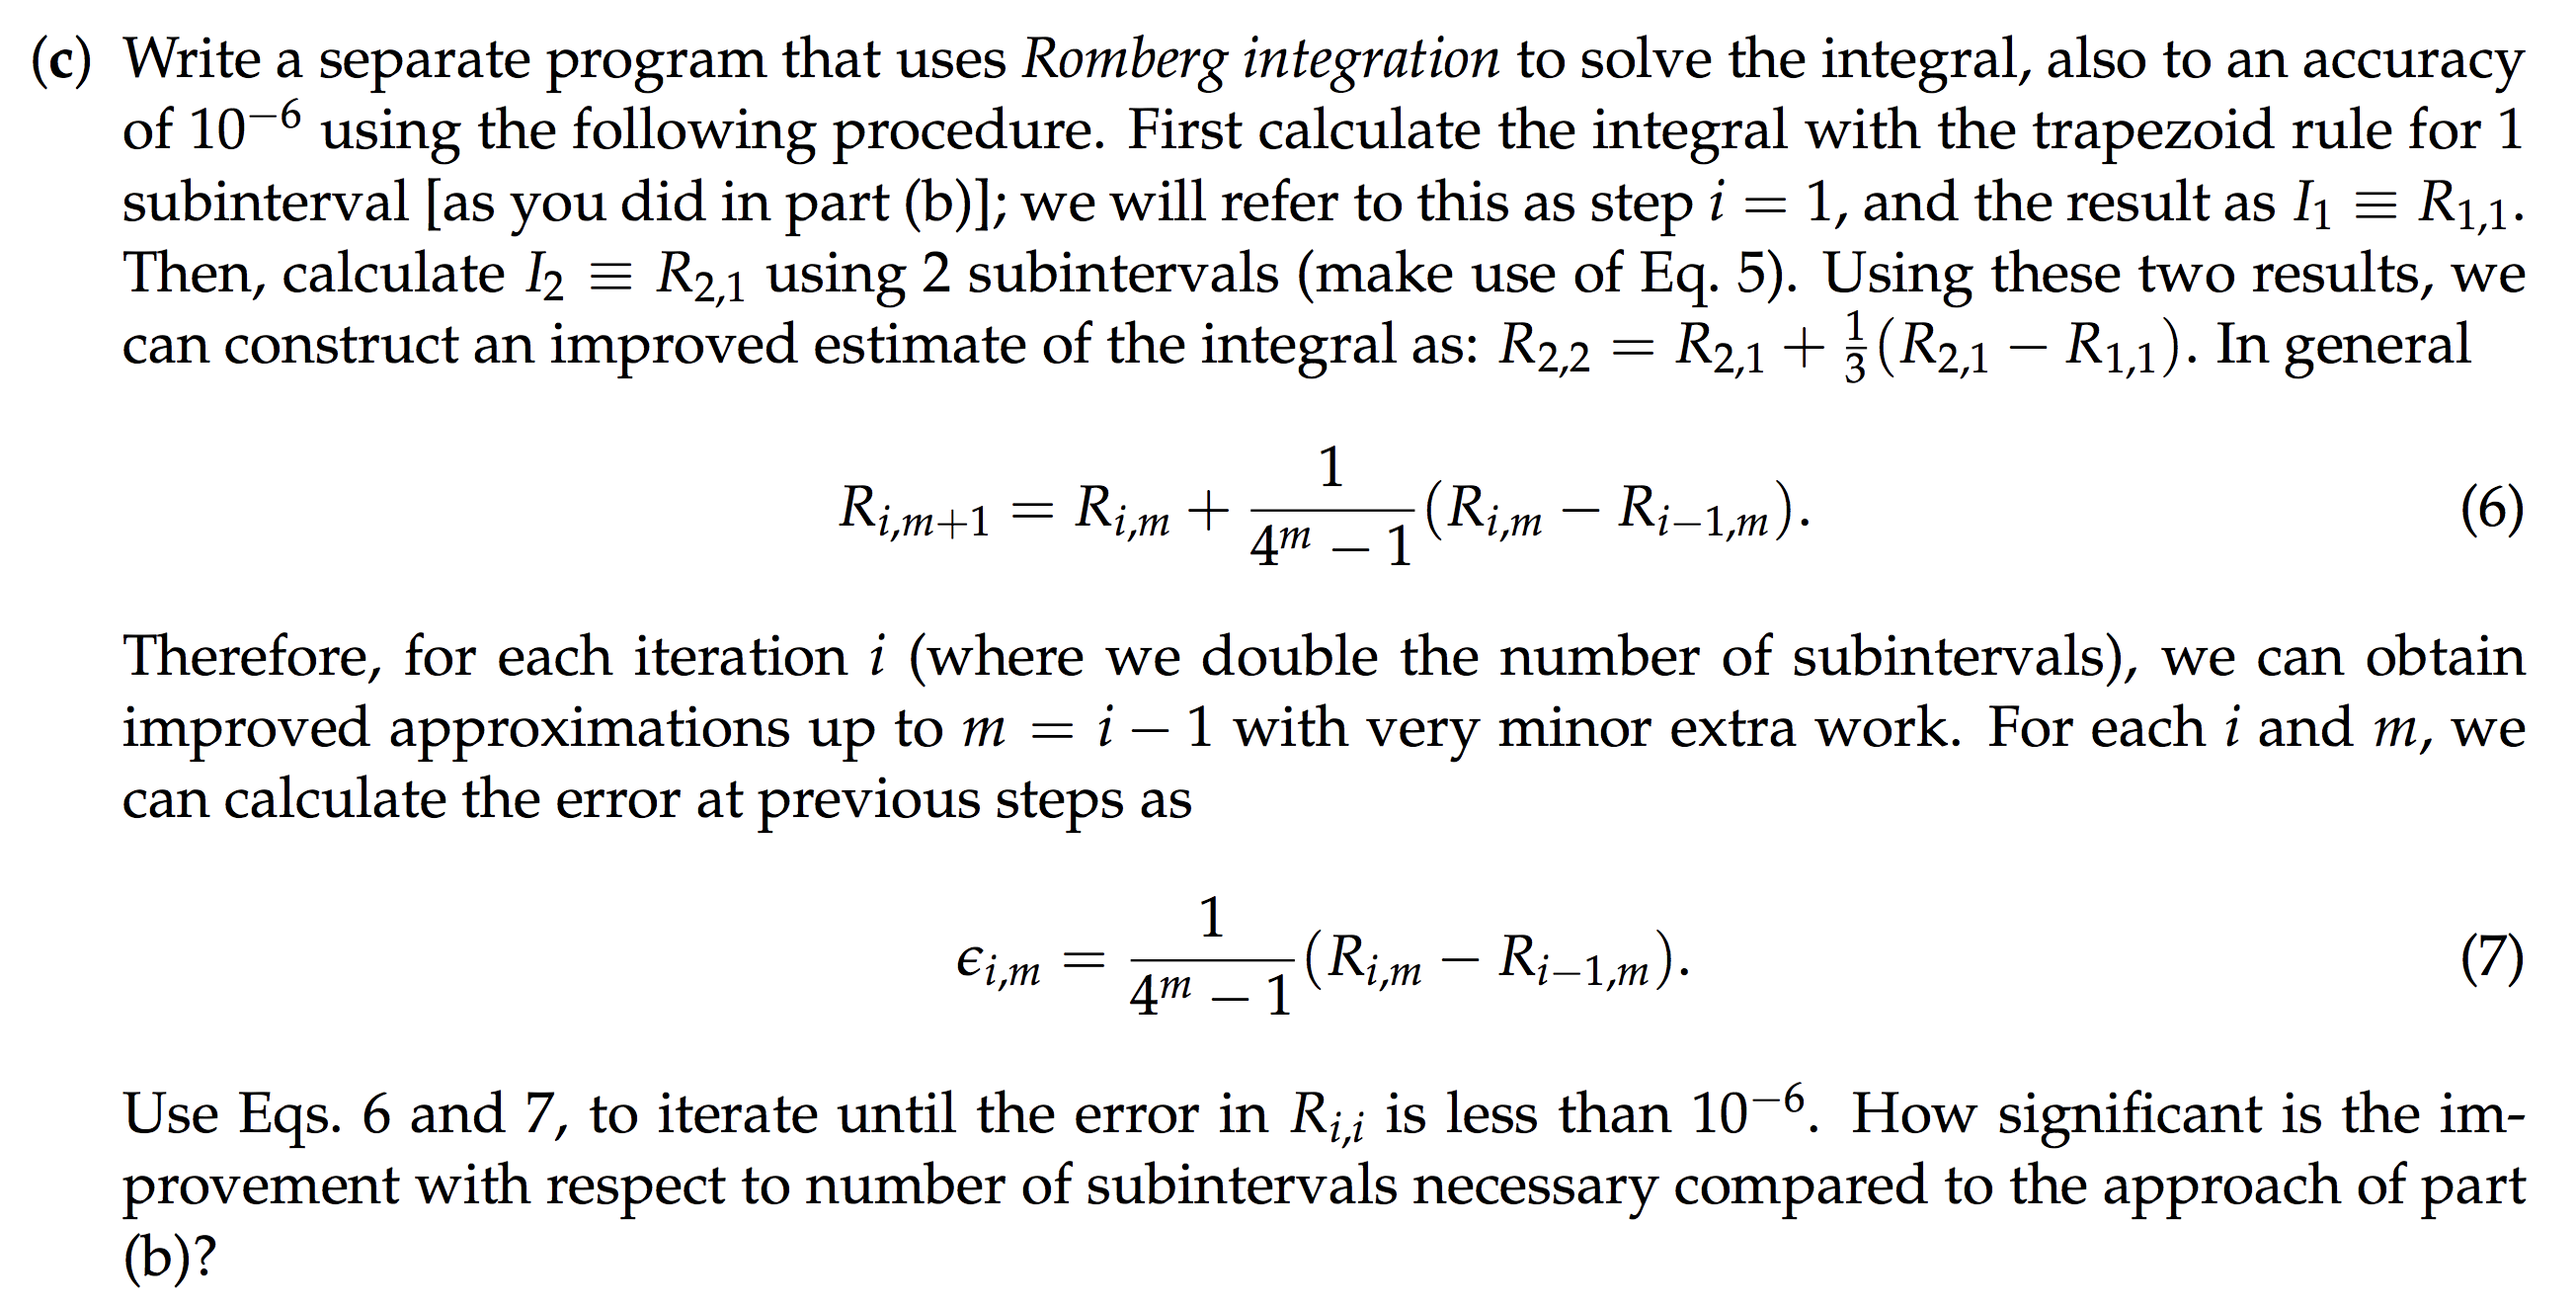

In [31]:
# Note: I have used ChatGPT for help in writing this code.

def func(x: float):
    return np.sin(np.sqrt(100*x))**2


def romberg_int(x_low: float, x_high: float, err: float, num_int: int):
    """ 
        Function to compute the value of integral using Adaptive/Extended Romberg integration.
    """

    trap = np.zeros(num_int) # For storing the coeff of trap update rule Eq(5)
    h = (x_high - x_low) # interval length for the first iteration, decreasing by half in every iteration

    trap[0] =  (h) * (1/2) * (func(x_high) + func(x_low)) # crude estimate from the first iteration of trap method

    i,m = 1,1 
    while (i < num_int):
        h /= 2
        s = 0.0 
        for j in range(m):
            s += func(x_low + h + j*2*h)
        trap[i] = trap[i-1]/2 + h*s # Adaptive trap update rule
        i += 1 
        m *= 2
    
    # print(trap[-1])
    
    romb = np.zeros((num_int,num_int))
    err_romb = np.zeros(num_int)

    for i in range(num_int):
        romb[i][0] = trap[i] # First approx using romb integration equal to trap result
    
    for i in range(num_int):
        j = 1
        m = 2
        while (j <= i):
            r = (2.0)**m # 4^m coeff in the denominator
            romb[i][j] = (r*romb[i][j-1] - romb[i-1][j-1]) / (r-1)
            err_romb[i] = (1/r-1) * (romb[i][j] - romb[i-1][j-1])
            j += 1
            m += 2

    print(romb)
    print(np.abs(err_romb))

    num_steps = np.where(np.abs(err_romb) < err)[0]
    
    return print("Using Romberg Integration, No. of iterations needed to get error below tolerance: ", num_int - len(num_steps) + 1)

romberg_int(x_low=0.0, x_high=1.0, err=1e-6, num_int=10)

[[0.14797948 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.32523191 0.38431605 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.51228285 0.57463317 0.58732097 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.40299745 0.36656898 0.35269804 0.34897386 0.         0.
  0.         0.         0.         0.        ]
 [0.43010337 0.43913868 0.44397666 0.44542552 0.44580376 0.
  0.         0.         0.         0.        ]
 [0.44841467 0.45451843 0.45554375 0.45572735 0.45576775 0.45577749
  0.         0.         0.         0.        ]
 [0.45391293 0.45574569 0.4558275  0.45583201 0.45583242 0.45583248
  0.45583249 0.         0.         0.        ]
 [0.4553485  0.45582703 0.45583245 0.45583253 0.45583253 0.45583253
  0.45583253 0.45583253 0.         0.        ]
 [0.45571127 0.45583219 0.45583253 0.45583253 0.45583253 0.45583253
  0.45583253 0.45583253 0.45583253 0.        ]
 [0.4

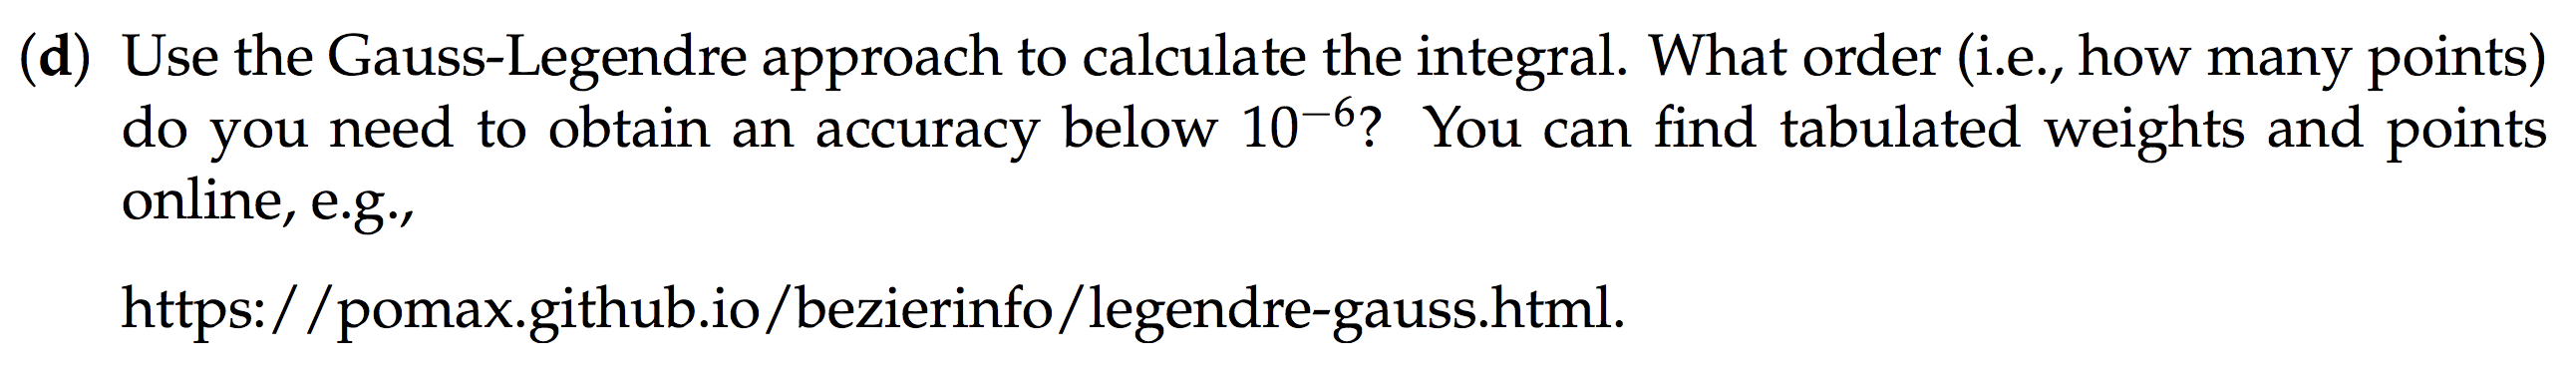

In [35]:
def gauss_integral(x_low, x_high, num_int, tol):

    gauss = np.zeros(num_int)
    err = np.zeros(num_int)

    steps = 0

    for i in range(1,num_int):
        x,w = np.polynomial.legendre.leggauss(i) # Use numpy library's function to get weights and nodes
        x_t = 0.5 * (x_high - x_low) * x + 1/2 * (x_high + x_low) # Transform the interval [0,1] to [-1,1] for Gauss-Legendre Quadrature 
        w_t = 0.5 * (x_high - x_low) * w
        gauss[i] = np.sum( w_t * np.sin(np.sqrt(100*x_t))**2 )
        print(gauss[i])
        err = np.abs(gauss[i] - gauss[i-1])
        steps = i
        if (np.abs(err) < tol): break

    return print("Using Gauss-Legendre Quadrature, No. of steps needed for the error to go below tol: ", steps)

gauss_integral(x_low=0.0, x_high=1.0, num_int=20, tol=1e-6)


0.5024843310662972
0.6273262731105194
0.23603692720508807
0.42670930479562474
0.5631145323435272
0.47022277556126596
0.45644586447958313
0.45584440641945256
0.45583265544354196
0.45583253306543103
Using Gauss-Legendre Quadrature, No. of steps needed for the error to go below tol:  10


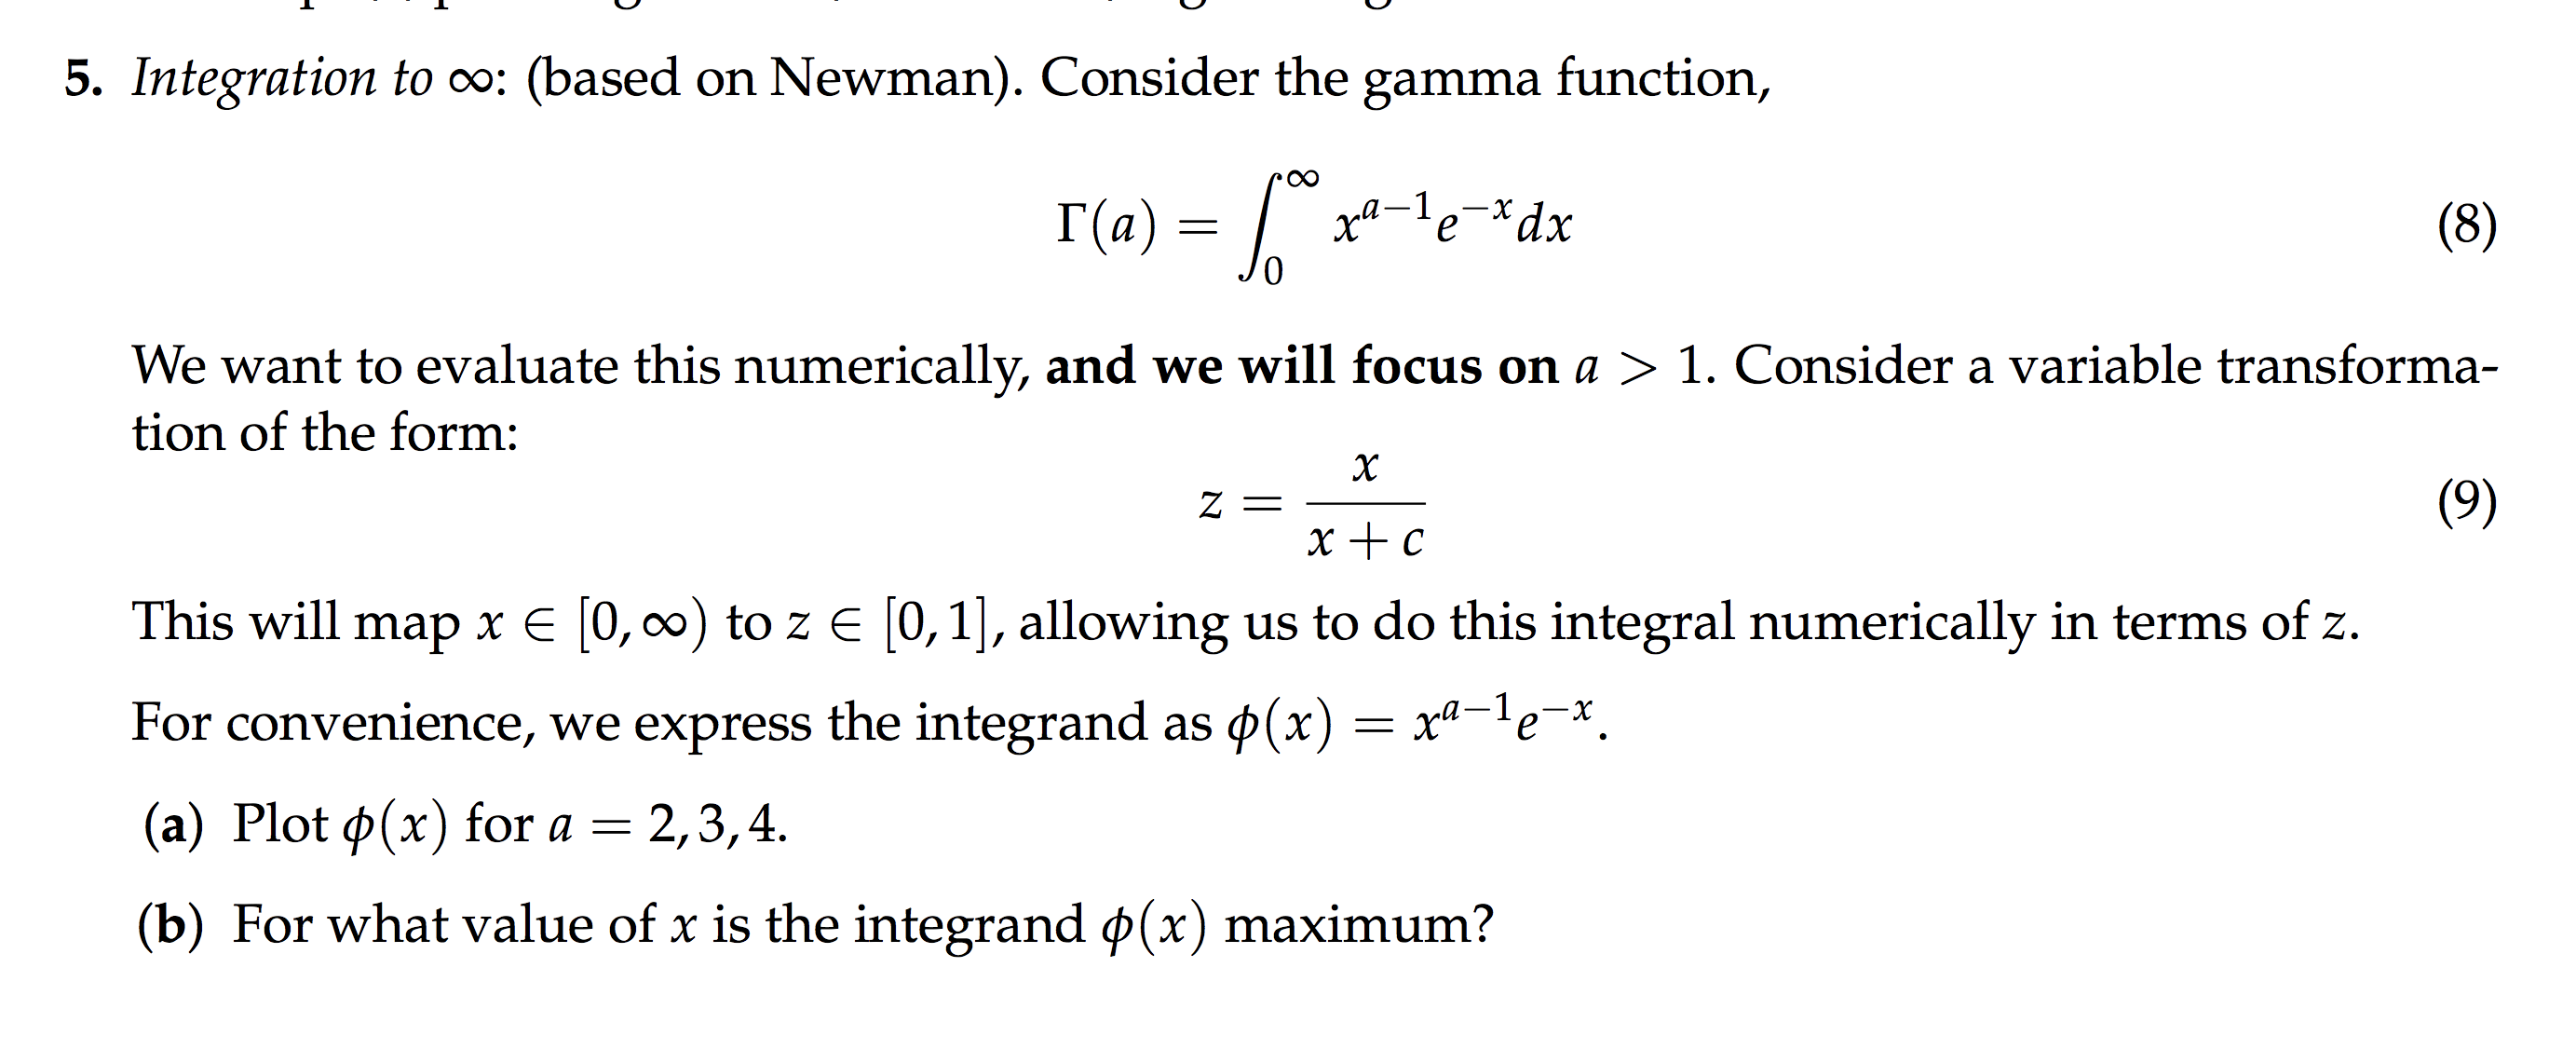

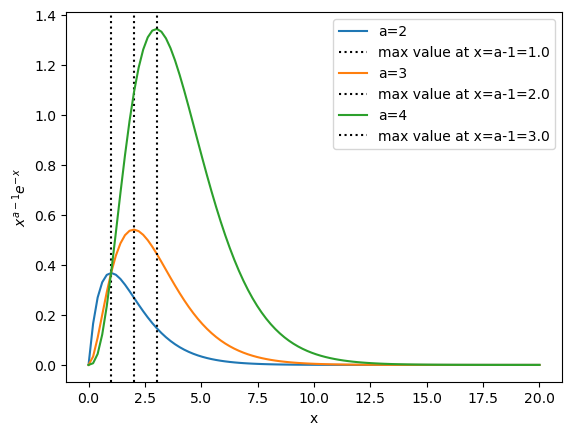

In [38]:
a = [2,3,4]

def func(x: float, a: int):
    return x**(a-1) * np.exp(-x)

for i in a:
    x = np.linspace(0,20,100)
    y = func(x, i)
    plt.plot(x,y, label=f"a={i}")
    x_max = x[np.argmax(y)]
    plt.axvline(x=x_max, linestyle="dotted", color="black", label=f"max value at x=a-1={x_max:.1f}")
    plt.xlabel("x")
    plt.ylabel(r"$x^{a-1}e^{-x}$")
    plt.legend()
    

**Q4(b)** We can analytically calculate that at $x=a-1$ the integrand has the maximum value.

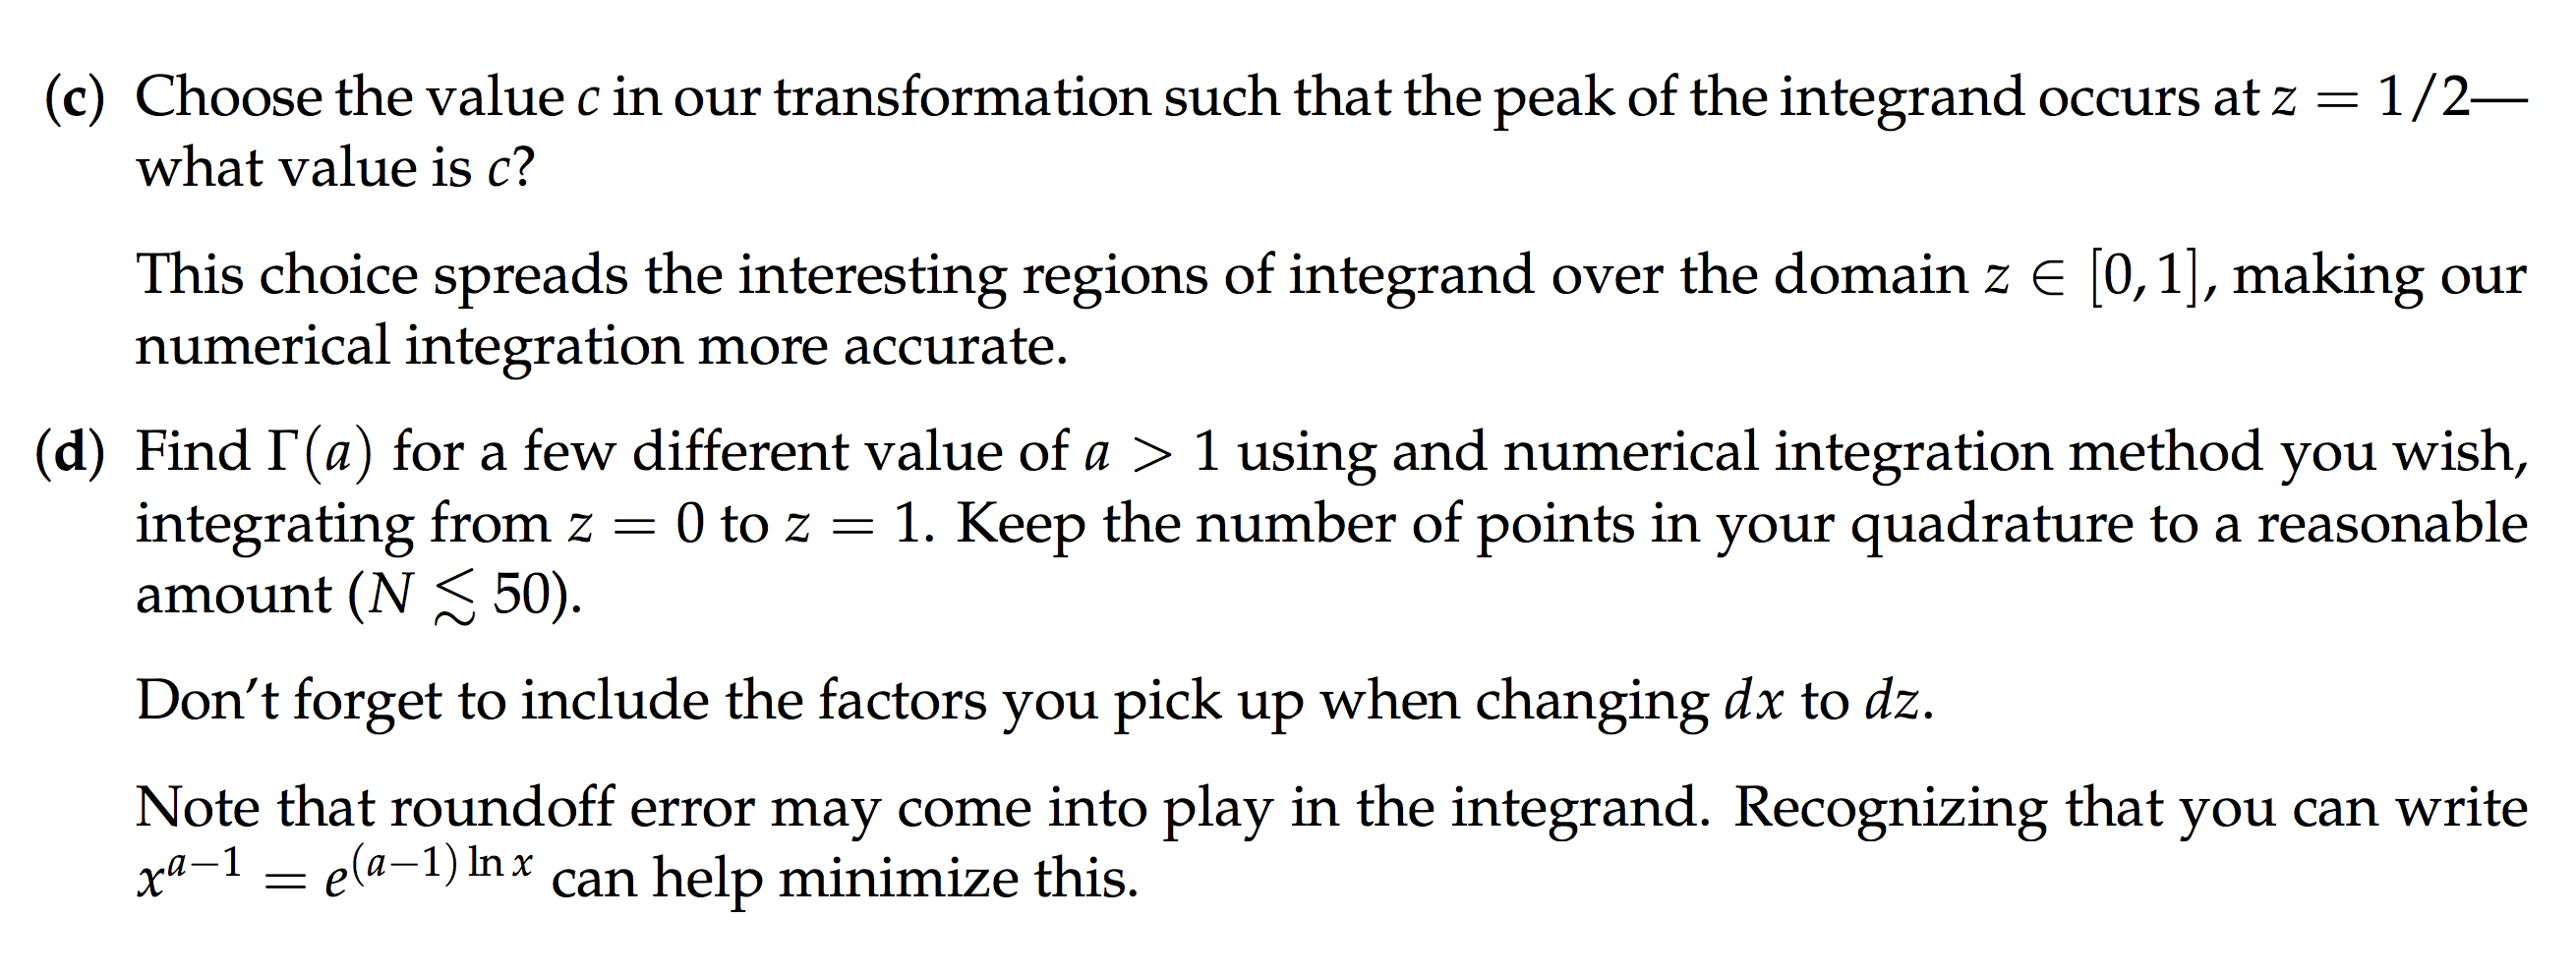

**Q5(c)** After subsituting $z=\frac{x}{x+c}$, and including the factors when changing $dx$ to $dz$, we get the integrand, $$f(z) = \frac{z^{a-1}c^{a}e^{\big(-\frac{zc}{1-z}\big)}}{(1-z)^{a+1}}$$

By computing $f'(z)$ analytically, and using the fact $f'(z=1/2) = 0$, we get that c=a.

In [39]:
# Using Gauss-Legendre Quadrature for integration 

x_high = 1.0
x_low = 0.0

for a in range(2,6):
    gauss_integral = []
    for i in range(1,40):
        x,w = np.polynomial.legendre.leggauss(i)  # Sample the nodes and weights using a Numpy library function
        x_t = 0.5 * (x_high - x_low) * x + 1/2 * (x_high + x_low) # transform the interval to [-1,1]
        w_t = 0.5 * (x_high - x_low) * w
        gauss_integral.append(np.sum( w_t * ( x_t**(a-1)* a**a * np.exp(-x_t*a/(1-x_t))/((1-x_t)**(a+1)) ) ))
    print(f"When a = {a}, the value computed using Gauss-Legendre Quadrature is: ", gauss_integral[-1])    # Print the last element with largest number of nodes

When a = 2, the value computed using Gauss-Legendre Quadrature is:  0.999999999998875
When a = 3, the value computed using Gauss-Legendre Quadrature is:  2.0000000000001696
When a = 4, the value computed using Gauss-Legendre Quadrature is:  5.999999999999926
When a = 5, the value computed using Gauss-Legendre Quadrature is:  23.99999999999832


**Q5(d)** We can see that the values calculated using the Gauss-Legendre Quadrature are very close to the known values of the Gamma function for diff values of a.